In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [86]:
df=pd.read_csv("economic_index.csv")

In [87]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [88]:
# dropiing unnessary cols
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)


In [89]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [90]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

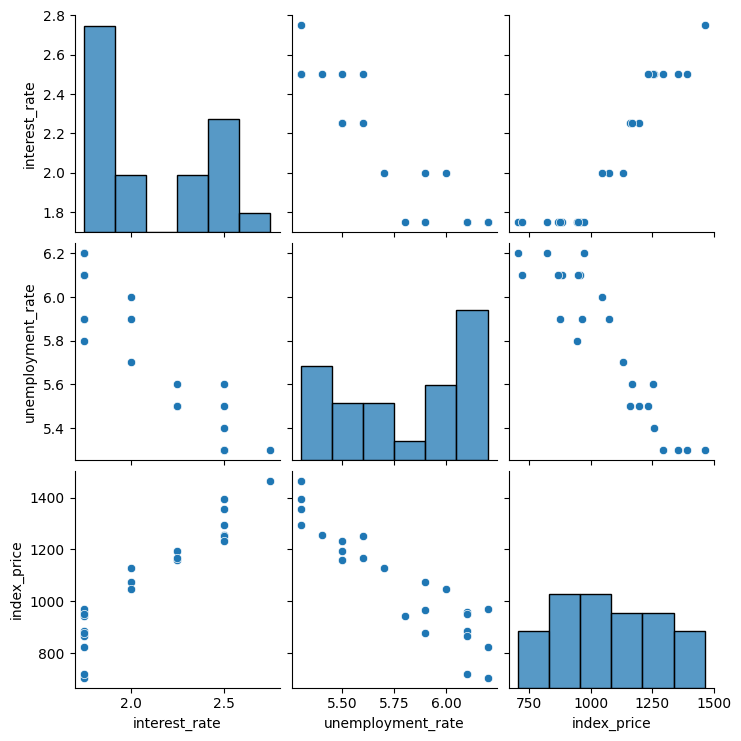

In [91]:
# visulatiozation
import seaborn as sns
sns.pairplot(df)

In [92]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'employmnet rate')

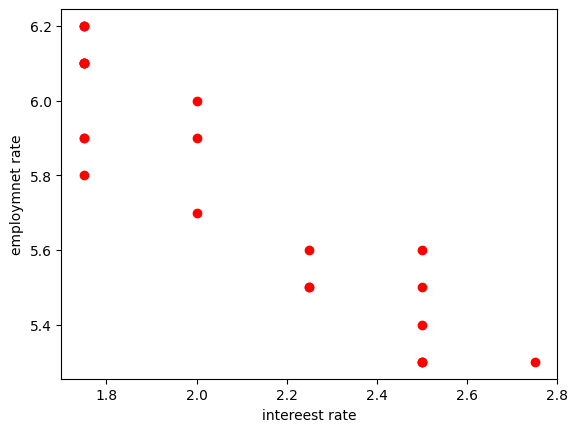

In [93]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('intereest rate')
plt.ylabel('employmnet rate')

In [94]:
x=df[['interest_rate','unemployment_rate']]
y=df['index_price']

In [95]:
x

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [96]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

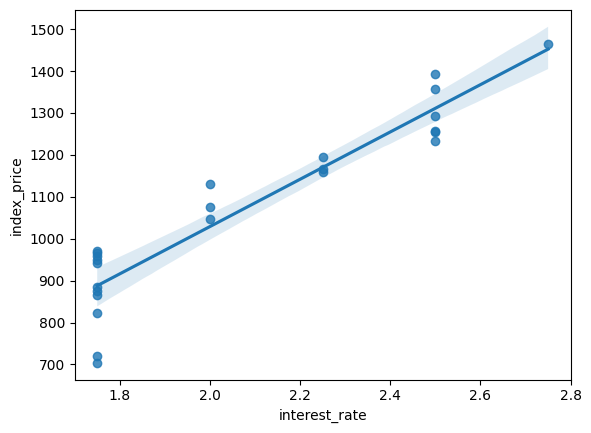

In [98]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [100]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [101]:
x_train

array([[ 0.55339859, -0.53244666],
       [-0.9486833 ,  0.41597395],
       [ 1.30443953, -1.48086727],
       [-0.9486833 ,  1.36439457],
       [ 1.30443953, -0.53244666],
       [ 1.30443953, -1.48086727],
       [-0.19764235,  0.73211416],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -1.48086727],
       [ 1.30443953, -1.16472707],
       [-0.9486833 ,  1.36439457],
       [-0.9486833 ,  1.04825436],
       [-0.9486833 ,  0.41597395],
       [-0.9486833 ,  1.04825436],
       [ 0.55339859, -0.84858687],
       [-0.19764235, -0.21630646],
       [-0.9486833 ,  0.09983375],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -0.84858687]])

In [102]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [103]:
regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [104]:
from sklearn.model_selection import cross_val_score
validate_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [105]:
np.mean(validate_score)

np.float64(-5674.031667186762)

In [106]:
# prediction

y_pred=regression.predict(x_test)
y_pred

array([1192.92068422,  846.6908733 , 1374.53556008,  879.61386031,
       1003.34428525])

In [107]:
# performance metric
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5952.207497480526
64.7472210563656
77.15055085662401


In [108]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.8507000324705944


0.7014000649411889

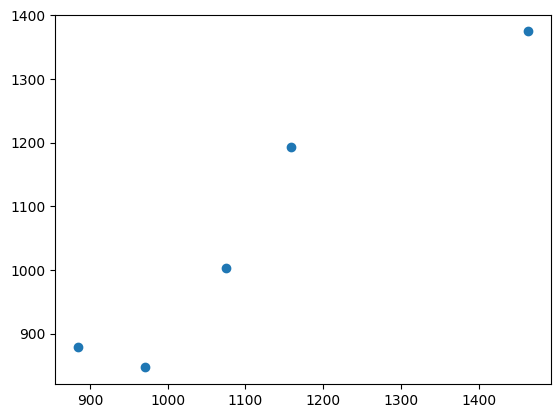

In [109]:
# assumption
plt.scatter(x=y_test,y=y_pred)



In [110]:
residual=y_test-y_pred
print(residual)

8     -33.920684
16    124.309127
0      89.464440
18      4.386140
11     71.655715
Name: index_price, dtype: float64


In [111]:
sns.distplot(residual,kind='kde')

TypeError: distplot() got an unexpected keyword argument 'kind'

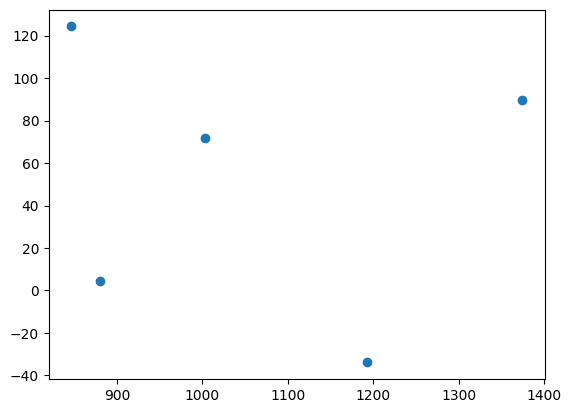

In [113]:
# scatter plot wrt prediction and residual
plt.scatter(y_pred,residual)